# import libraries

In [158]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [129]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# data preprocessing

In [131]:
# check null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [132]:
# drop unuseful data 
data_droped = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns')

In [133]:
data_droped.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [134]:
# encode the gender, Geography
le = LabelEncoder()
for i in ['Gender', 'Geography']:
    data_droped[i] = le.fit_transform(data_droped[i])

In [135]:
data_droped

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [136]:
data_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [137]:
# splitting each features and target
features = data_droped.iloc[:, :-1].values
target = data_droped.iloc[:, -1].values

# Train Test Splitting

In [138]:
x_train, x_test, y_train, y_test = train_test_split(features , target ,   test_size = 0.2, random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

# Feature Scaling

In [139]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building the ANN

In [142]:
ann = Sequential()

In [143]:
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(1 , activation='sigmoid'))

In [148]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [150]:
ann.fit(x_train, y_train, epochs = 100 , batch_size = 32, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 703us/step - loss: 0.3306 - accuracy: 0.8653 - val_loss: 0.3489 - val_accuracy: 0.8606
Epoch 2/100
200/200 [==============================] - 0s 689us/step - loss: 0.3303 - accuracy: 0.8650 - val_loss: 0.3492 - val_accuracy: 0.8600
Epoch 3/100
200/200 [==============================] - 0s 630us/step - loss: 0.3305 - accuracy: 0.8641 - val_loss: 0.3487 - val_accuracy: 0.8619
Epoch 4/100
200/200 [==============================] - 0s 601us/step - loss: 0.3308 - accuracy: 0.8655 - val_loss: 0.3503 - val_accuracy: 0.8619
Epoch 5/100
200/200 [==============================] - 0s 546us/step - loss: 0.3303 - accuracy: 0.8648 - val_loss: 0.3487 - val_accuracy: 0.8619
Epoch 6/100
200/200 [==============================] - 0s 587us/step - loss: 0.3306 - accuracy: 0.8650 - val_loss: 0.3503 - val_accuracy: 0.8606
Epoch 7/100
200/200 [==============================] - 0s 583us/step - loss: 0.3306 - accuracy: 0.8648 - val_loss: 0.3500 - val_ac

# Accuracy

In [154]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

accuracy_score : 0.86


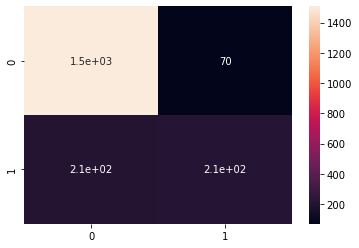

In [161]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print('accuracy_score :' ,accuracy_score(y_test, y_pred))